# <font color="red">B0:Cài đặt thư viện và import </font>
- pip install pandas <br>
- pip install numpy <br>
- pip install matplotlib <br>
- pip install scikit-learn (sklearn) <br>
- pip install pickle (nếu lỗi version thì pip install pickle5) <br>
- pip install yfinance (data về chứng khoán) <br>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# <font color="red">B1:Đọc DATA và khám phá dữ liệu ( Công ty Microsoft) </font>

In [2]:
# Ticker symbol của cổ phiếu bạn muốn dự đoán
ticker_symbol = 'MSFT'

# Lấy dữ liệu lịch sử giá cổ phiếu
stock_data = yf.download(ticker_symbol, start='2003-10-20', end='2023-10-20')


[*********************100%%**********************]  1 of 1 completed


In [3]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-10-20,28.950001,29.370001,28.799999,29.350000,18.394114,38794500
2003-10-21,29.350000,29.430000,29.170000,29.350000,18.394114,44166800
2003-10-22,29.030001,29.209999,28.799999,28.889999,18.105824,48798500
2003-10-23,28.719999,29.080000,28.100000,28.910000,18.118355,67357900
2003-10-24,27.270000,27.400000,26.420000,26.610001,16.676908,210558300
...,...,...,...,...,...,...
2023-10-13,332.380005,333.829987,326.359985,327.730011,327.730011,21072400
2023-10-16,331.049988,336.140015,330.600006,332.640015,332.640015,22158000
2023-10-17,329.589996,333.459991,327.410004,332.059998,332.059998,18338500


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5035 entries, 2003-10-20 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5035 non-null   float64
 1   High       5035 non-null   float64
 2   Low        5035 non-null   float64
 3   Close      5035 non-null   float64
 4   Adj Close  5035 non-null   float64
 5   Volume     5035 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.4 KB


In [5]:
stock_data.keys()
# Những feature của tập dữ liệu

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [6]:
stock_data.describe()
# Thống kê mô tả về tập dữ liệu

,Open,High,Low,Close,Adj Close,Volume
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000,5.035000e+03
mean,85.317498,86.172647,84.447170,85.342371,79.371501,4.703265e+07
std,90.518917,91.473685,89.529900,90.542409,91.715817,2.884883e+07
min,15.200000,15.620000,14.870000,15.150000,11.327570,7.425600e+06
25%,27.209999,27.430000,27.010000,27.230000,20.029046,2.673180e+07
50%,35.880001,36.060001,35.490002,35.740002,29.652859,4.071710e+07
75%,107.170002,108.139999,105.785000,107.009998,101.618893,5.954170e+07
max,361.750000,366.779999,352.440002,359.489990,358.730469,5.910522e+08


# <font color="red">B2:Kiểm tra và tiền xử lý dữ liệu(nếu có) </font>

In [7]:
stock_data.shape
# kích thước dữ liệu

(5035, 6)

In [8]:
stock_data.dtypes
#Kiểu dữ liệu của từng feature

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
stock_data.isnull().sum()
#check missing value

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### <font color = 'yellow' >Ta thấy tập dữ liệu này khá là sạch<font>

In [10]:
# Chọn cột 'Adj Close' (giá đóng cửa đã điều chỉnh) làm biến phụ thuộc (y)
y = stock_data['Adj Close']
y

Date
2003-10-20     18.394114
2003-10-21     18.394114
2003-10-22     18.105824
2003-10-23     18.118355
2003-10-24     16.676908
                 ...    
2023-10-13    327.730011
2023-10-16    332.640015
2023-10-17    332.059998
2023-10-18    330.109985
2023-10-19    331.320007
Name: Adj Close, Length: 5035, dtype: float64

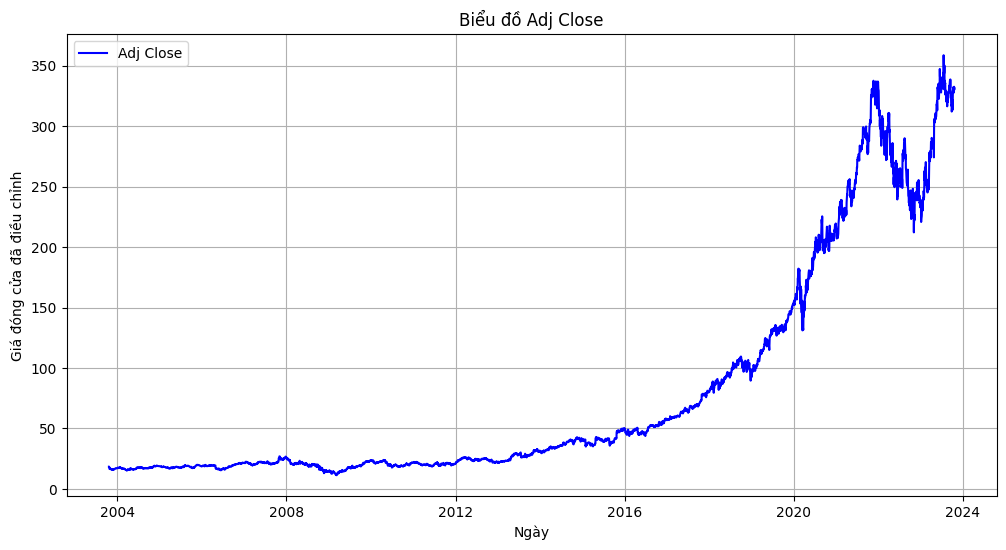

In [11]:
# Vẽ biểu đồ đường cho cột 'Adj Close'
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, y, label='Adj Close', color='blue')
plt.title('Biểu đồ Adj Close')
plt.xlabel('Ngày')
plt.ylabel('Giá đóng cửa đã điều chỉnh')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Chọn các cột trừ cột 'Adj Close' làm biến độc lập (x)
X = stock_data.drop(columns=['Adj Close'])
X

,Open,High,Low,Close,Volume
Date,,,,,
2003-10-20,28.950001,29.370001,28.799999,29.350000,38794500
2003-10-21,29.350000,29.430000,29.170000,29.350000,44166800
2003-10-22,29.030001,29.209999,28.799999,28.889999,48798500
2003-10-23,28.719999,29.080000,28.100000,28.910000,67357900
2003-10-24,27.270000,27.400000,26.420000,26.610001,210558300
...,...,...,...,...,...
2023-10-13,332.380005,333.829987,326.359985,327.730011,21072400
2023-10-16,331.049988,336.140015,330.600006,332.640015,22158000
2023-10-17,329.589996,333.459991,327.410004,332.059998,18338500


### <font color = 'yellow' >Thay vì sử dụng chỉ số( index) là số thứ tự thì ta sẽ dùng ngày tháng. Do ko ảnh hưởng đến việc huấn luyện nên ta không cần chuyển về dạng số thứ tự<font>

### <font color = 'yellow' >Ta hãy lưu mô hình chuẩn hóa sau vào 1 file, để sau này chúng ta sẽ chuẩn hóa dữ liệu nhập vào theo file này( lưu chuẩn hóa của X vì dữ liệu chúng ta nhập vào là tập dữ liệu X, tức đầu vào)<font>

In [13]:
# Chuẩn hóa Min_Max_Scaler cho từng tập dữ liệu X( đầu vào) 
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()
minmax_scale.fit(X)
# Lưu mô hình chuẩn hóa vào tệp "minmax_scaler_x.pkl" bằng pickle
import pickle
with open("../Scaler_data/Scaler_Microsoft.pkl", "wb") as file:
    pickle.dump(minmax_scale, file)
df_minmax_x = minmax_scale.transform(X)
X_normalizier = pd.DataFrame(df_minmax_x, columns=X.columns, index= X.index) # Chuyển lại về dạng df cho dễ nhìn
X_normalizier


,Open,High,Low,Close,Volume
Date,,,,,
2003-10-20,0.039677,0.039156,0.041266,0.041238,0.053748
2003-10-21,0.040831,0.039327,0.042362,0.041238,0.062953
2003-10-22,0.039908,0.038700,0.041266,0.039902,0.070889
2003-10-23,0.039013,0.038330,0.039192,0.039961,0.102689
2003-10-24,0.034829,0.033546,0.034215,0.033281,0.348053
...,...,...,...,...,...
2023-10-13,0.915250,0.906168,0.922742,0.907766,0.023383
2023-10-16,0.911412,0.912746,0.935302,0.922025,0.025243
2023-10-17,0.907200,0.905114,0.925852,0.920340,0.018698


In [14]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X_normalizier, y, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#kiểm tra độ lớn của dữ liệu sau khi chia

(4028, 5)
(1007, 5)
(4028,)
(1007,)


# <font color = 'red'>3:Huấn luyện mô hình<font>

In [16]:
# Mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train) # fit chính là hàm đào tạo

LinearRegression()

# <font color="red">4:Đánh giá mô hình</font>

In [17]:
from sklearn.metrics import mean_squared_error, r2_score
#mean_squared_error càng thấp(về 0) càng tốt
#r2_score càng cao càng tốt

In [18]:
y_pred = model.predict(X_test) #dự báo y_pred dựa trên tập x_test
y_pred_train = model.predict(X_train)
# Đánh giá mô hình bằng một số các metric, gói gọn vào 1 hàm để sử dụng ở phần sau
def rate(y_test, y_pred,y_train,y_pred_train):
    print('--------Kết quả trên dữ liệu huấn luyện-------')
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)

    print("Mean Squared Error (MSE):", mse_train)
    print("R-squared (R2) Score:", r2_train)

    print('--------Kết quả thẩm định-------')
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R2) Score:", r2)

In [19]:
rate(y_test, y_pred,y_train,y_pred_train)

--------Kết quả trên dữ liệu huấn luyện-------
Mean Squared Error (MSE): 1.9263475544074384
R-squared (R2) Score: 0.9997693521851273
--------Kết quả thẩm định-------
Mean Squared Error (MSE): 2.1186873159877564
R-squared (R2) Score: 0.9997548663669985


In [20]:
print(y_test)

Date
2018-04-09     85.298958
2022-06-09    261.700928
2012-12-12     22.309122
2020-08-31    219.502670
2008-11-04     17.355864
                 ...    
2013-10-22     28.957798
2018-03-14     88.193314
2005-08-22     19.026505
2023-05-08    307.326050
2008-10-31     16.470739
Name: Adj Close, Length: 1007, dtype: float64


In [21]:
print(y_pred)

[ 85.27209176 261.69401001  20.68812431 ...  20.37809216 304.98104079
  15.20346519]


In [22]:
df_result = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_compare = df_result.head(10)
df_compare
#so sánh dữ liệu thực tế với dự đoán

,Actual,Predicted
Date,,
2018-04-09,85.298958,85.272092
2022-06-09,261.700928,261.694010
2012-12-12,22.309122,20.688124
2020-08-31,219.502670,221.319349
2008-11-04,17.355864,16.640396
2013-04-17,23.806795,22.171240
2004-10-04,17.675243,21.342168
2020-09-14,199.920395,201.289461
2020-04-17,172.926102,173.532413


<Axes: xlabel='Date'>

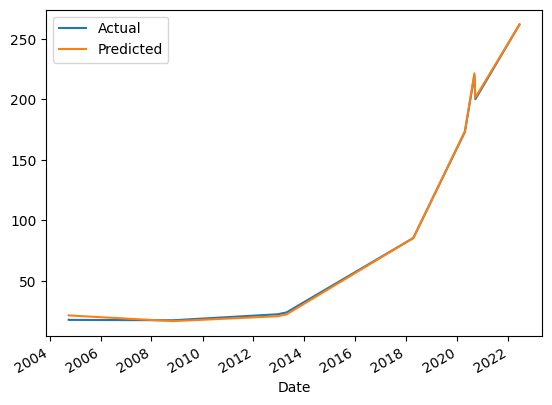

In [23]:
df_compare.plot(kind='line')
# lập biểu đồ độ để dễ đánh giá

### <font color = "green"> Ta thấy mô hình quá tốt<font>

# <font color="red">5:Lưu mô hình</font>

Ta đang triển khai mô hình trong biến model

In [24]:
import pickle
# Tải mô hình từ file
with open('../Model_data/Microsoft.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)